In [1]:
using JLD

num_threads_range = [1,2,3,4,6,8,12,16,32,64]
d = load("thread_data/1_threads.jld")

N_range =  d["N_range"]

total_elapsed_range = zeros((length(num_threads_range),length(N_range))) 

for (i,num_threads) in enumerate(num_threads_range)
	d = load("thread_data/$(num_threads)_threads.jld")

	N_range =  d["N_range"]
	total_elapsed_range[i,:] =  d["elapsed_range"]
	num_threads = d["num_threads"]
end

multiprocessing = false
construct = multiprocessing ? "processes" : "threads"
println(N_range)

println(total_elapsed_range)

[100,200,400,800,1600,2500]
[0.

In [2]:
using PyPlot


0044627077199999995 0.027400638445 0.19481847108 0.6414254055999999 1.5664829263333333 4.474536864
 0.003069698415 0.01610342659 0.11938493469999999 0.3439108385 0.9242959403333333 2.5450511270000002
 0.002549872185 0.012785759809999998 0.08753585881999999 0.2357021085 0.599240804 1.7538382536666666
 0.00267781996 0.012898675935 0.06701643384 0.1868834074 0.5236790426666666 1.3094722813333333
 0.00231224734 0.016055482725 0.07268550618 0.1438765994 0.34209802333333333 0.882624763
 0.0027580649899999997 0.02085140041 0.07830562444 0.10719877920000001 0.3126699 0.6883325003333334
 0.002744112735 0.021860560135 0.06421456472 0.08480561610000001 0.22234489733333332 0.5907406256666666
 0.0043787169749999995 0.038499185185 0.11092410638 0.11569589360000002 0.233975602 0.5018945616666667
 0.008584802945 0.039959596055 0.16128256732000001 0.1125427501 0.13636181233333333 0.4338473253333333
 0.01426590443 0.0226101137 0.1511102103 0.141475769 0.2630278013333333 0.42195694166666664]


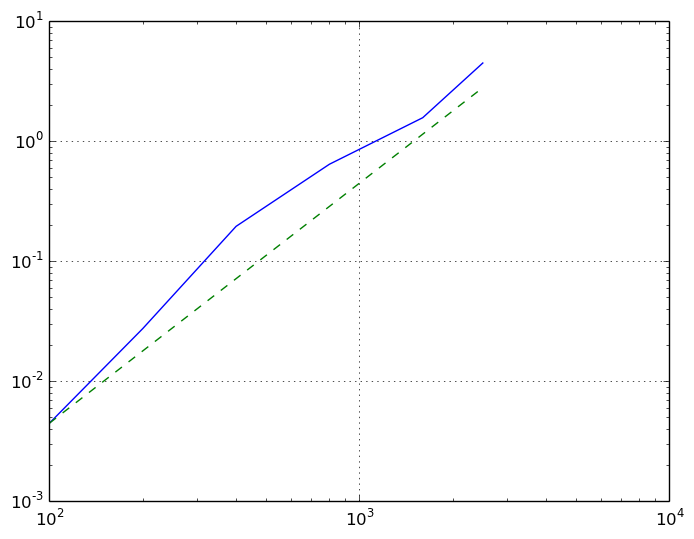

In [37]:
colors = ["r","b","g","c","y","k"]
for i in 1:1#size(total_elapsed_range)[1]
    loglog(N_range,total_elapsed_range[i,:]')
    loglog(N_range,total_elapsed_range[1,1]*N_range.^2./N_range[1]^2,"--")
end

grid()

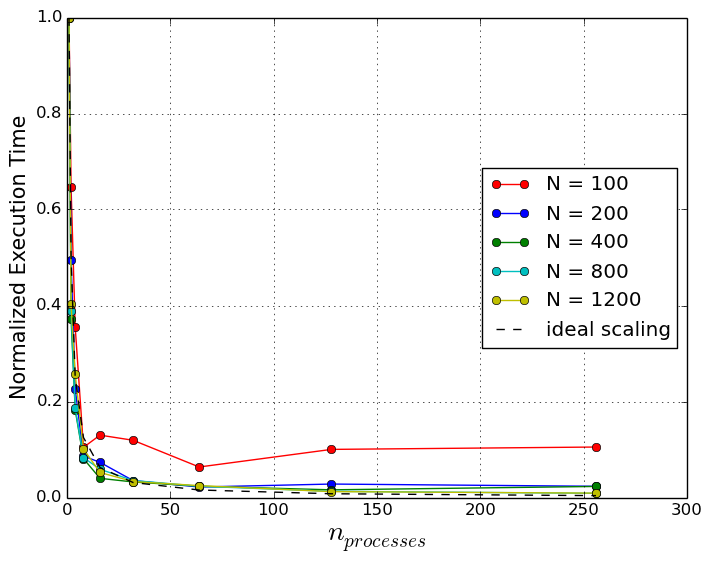

In [60]:


colors = ["r","b","g","c","y","k"]
for i in 1:size(total_elapsed_range)[2]#[3,4,6]
    plot(num_threads_range,total_elapsed_range[:,i]/total_elapsed_range[1,i],"-o",label="N = $(N_range[i])",color=colors[i])
end
plot(num_threads_range,1./num_threads_range,linestyle ="--",color=colors[end],label="ideal scaling")
grid()
legend(loc="center right")
xlabel(latexstring("\$n_{$construct}\$"),size=20)
ylabel("Normalized Execution Time",size=15)
savefig("../figures/timing_vs_$(construct).png")

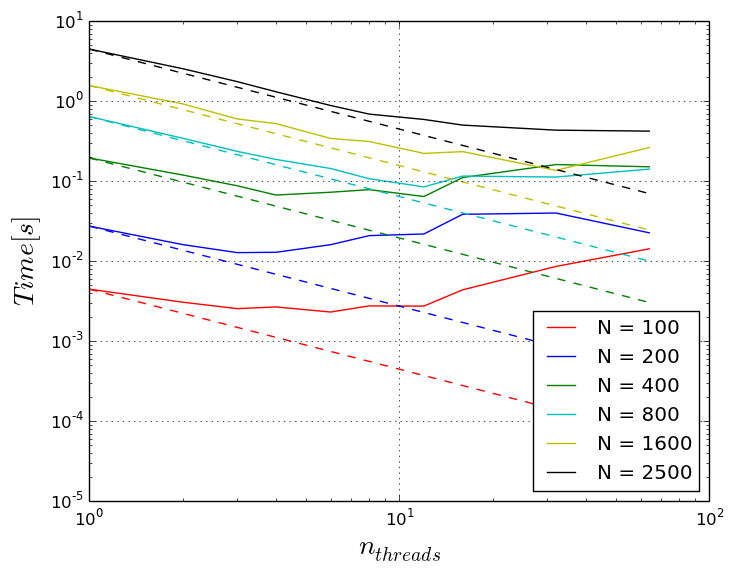

In [8]:
colors = ["r","b","g","c","y","k"]
for i in 1:size(total_elapsed_range)[2]
    loglog(num_threads_range,total_elapsed_range[:,i],label="N = $(N_range[i])",color=colors[i])
    loglog(num_threads_range,total_elapsed_range[1,i]./num_threads_range,linestyle ="--",color=colors[i])
end
grid()
legend(loc="lower right")
xlabel(latexstring("\$n_{$construct}\$"),size=20)
ylabel(L"Time [s]",size=20)
savefig("../figures/timing_vs_$(construct)_loglog.png",bbox_inches="tight")

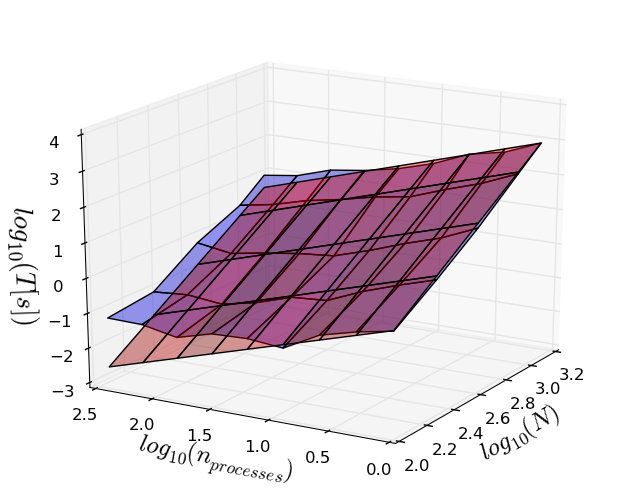

In [49]:
surf(log10(N_range),log10(num_threads_range),log10(total_elapsed_range),cstride=1,rstride=1,alpha=0.4,label="Timing")

exponent = multiprocessing ? 3 : 2
ideal_timing = log10(total_elapsed_range[1,end]*1/N_range[end]^(exponent)*num_threads_range[1]*(N_range.^exponent)'./num_threads_range)

surf(log10(N_range),log10(num_threads_range),ideal_timing,cstride=1,rstride=1,alpha=0.4,color="r",label="ideal")


ylabel(latexstring("\$log_{10}(n_{$construct})\$"),size=18)
xlabel(L"$log_{10}(N)$",size=18)
zlabel(L"$log_{10}(T [s])$",size=20)
gca()[:view_init](20,210)

savefig("../figures/timing_$(construct)_surf_right.png",bbox_inches="tight")

In [6]:
construct

"threads"

In [17]:
##load multiprocessing data

In [70]:
using JLD

d = load("multiprocessing_data/timing.jld")
nprocs_range = d["nprocs_range"]
N_range =  d["N_range"]

elapsed_parallel = d["elapsed_parallel"]
elapsed_serial = d["elapsed_serial"]

total_elapsed_range = [elapsed_serial elapsed_parallel]'
num_threads_range = [[1] ;nprocs_range]
println(N_range)
println(nprocs_range)

println(total_elapsed_range)
multiprocessing = true
construct = multiprocessing ? "processes" : "threads"

[100

"processes"

,200,400,800,1200]
[2,4,8,16,32,64,128,256]
[0.75193531 4.906016705 36.703821864 359.516830375 1350.213602614
 0.48569834 2.42632786 13.683626628 139.906348525 543.784236519
 0.266649927 1.112938836 6.70445555 66.983353689 347.003189505
 0.078562794 0.423551574 2.971842404 29.911378656 136.334040199
 0.097696144 0.3592815 1.465344955 21.142617322 70.346148384
 0.089658705 0.173307467 1.189144172 12.731948461 44.925021665
 0.047780789 0.107162907 0.861694409 8.443338354 33.389955809
 0.075362682 0.137484526 0.58695946 4.63801752 16.573926042
 0.079060268 0.114614902 0.845549572 3.140856429 12.285]


nodelist: holy2a[18301-18305]
cpus_per_node: 56,16,64(x2),56


In [65]:
function get_speedups(elapsed::Array)
    elapsed[1,:]./elapsed
end

get_speedups (generic function with 1 method)

In [71]:
maximum(get_speedups(total_elapsed_range))

114.46458585484106